<a href="https://colab.research.google.com/github/mariotv3/MDL/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [5]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [6]:
df = pd.read_csv("tmdb_5000_moviesTMDL2024.csv")
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

*Your text answer here*

the homepages are missing 3091 values.
No way of estimation

overview is missing 3 values.

release_date is missing 1.

runtime is missing 2.

tagline is missing 844.

searching for tyhe information omn google can provide good estimators


### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [8]:
df = df.loc[:, ['title', 'overview', 'genres']]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [9]:
df = df.dropna(axis=0, how='any')
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     4800 non-null   int64 
 1   title     4800 non-null   object
 2   overview  4800 non-null   object
 3   genres    4800 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.1+ KB


# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [10]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    out[unique_labels.index(label)] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(df.iat[index, 3]))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df['proc_genres'] = processed_genres

# one-hot encode genres
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    encoded_labels.append(encode_labels(processed_genres[index], unique_genres))

df['one_hot_genres'] = encoded_labels

100%|██████████| 4800/4800 [00:00<00:00, 13928.58it/s]


Verify that one-hot encodings are indeed as expected

In [11]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

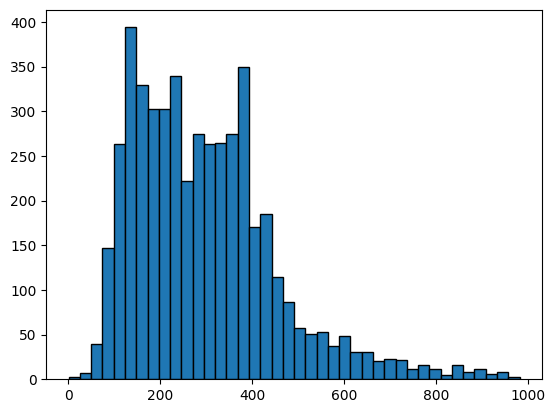

In [12]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for index, row in df.iterrows():
    processed_overviews.append(remove_punctuation(df.iat[index, 2]).lower())
df['proc_overview'] = processed_overviews

# get the word lengths of each overview and store it in a list
overview_lens = []
for string in processed_overviews:
  overview_lens.append(len(string))

# for the sake of simplicity, add these values as a column to the df
df['overview_len'] = overview_lens
plt.hist(df['overview_len'], bins='auto', edgecolor='black')
plt.show()

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

In [13]:
print(df['overview_len'].min())
print(df['overview_len'].max())
print(df['overview_len'].quantile(0.25))
print(df['overview_len'].quantile(0.5))
print(df['overview_len'].quantile(0.75))

1
982
174.0
276.0
381.0


*Your text answer here*

The mean is 276 which means tha I would drop the ones lower than 174 qnd truncate the ones above 381. This would mean that on both sides about 25% get modified/dropped.

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [14]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df['overview_len'] >= 15]

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
cut_overviews = []
for index, row in df.iterrows():
    cut_overviews.append((df.iat[index - 1, 6].split()[:15]))
df['proc_overview'] = cut_overviews
# print to verify
df['proc_overview']

0       [ever, since, the, second, grade, when, he, fi...
1       [in, the, 22nd, century, a, paraplegic, marine...
2       [captain, barbossa, long, believed, to, be, de...
3       [a, cryptic, message, from, bonds, past, sends...
4       [following, the, death, of, district, attorney...
                              ...                        
4795    [el, mariachi, just, wants, to, play, his, gui...
4796    [a, newlywed, couples, honeymoon, is, upended,...
4797    [signed, sealed, delivered, introduces, a, ded...
4798    [when, ambitious, new, york, attorney, sam, is...
4799    [ever, since, the, second, grade, when, he, fi...
Name: proc_overview, Length: 4799, dtype: object

### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [15]:
# hint: store all words for all movies in a set, change it to a list and sort
joint_overviews = []
for index, row in df.iterrows():
    for word in row['proc_overview']:
      joint_overviews.append(word)
vocab_overviews = sorted(list(set(joint_overviews)))

vocab_len = len(vocab_overviews)
print(vocab_len)
print(vocab_overviews)

12597
['00', '007', '1', '10', '100', '1000', '100000', '10191', '101yearold', '10th', '10year', '10yearold', '11', '11000', '117', '118', '119', '11th', '11year', '11yearold', '12', '1200', '1214', '1215', '1250', '12hour', '12year', '12yearold', '13', '1300', '1314', '13year', '13yearold', '14', '1408', '1429', '14year', '14yearold', '15', '1520s', '1536', '15th', '15year', '15yearold', '16', '1600s', '1630s', '16th', '16yearold', '17', '1700s', '17th', '17thcentury', '17yearold', '18', '180', '1800', '1800s', '1818', '1820', '1820s', '1831', '1834', '1836', '1839', '1841', '1845', '1850', '1850s', '1856', '1862', '1863', '1870s', '1875', '1876', '1879', '1880s', '1882', '18891971', '1890', '1890s', '18month', '18th', '18thcentury', '18thwedding', '18yearold', '19', '1900', '1905', '1910', '1914', '1919', '1920', '1920s', '1921', '1924', '1925', '19261929', '1927', '1930s', '1931', '1932', '1933', '1937', '1940s', '1941', '1942', '194344', '1944', '19441945', '1945', '1946', '1947', 

### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [16]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = [] # set of encodings for this overview
    for word in row["proc_overview"]:
        sentence_encode.append(encode_labels(word, vocab_overviews)) # get encoding for this word
    sentence_encode = np.sum(sentence_encode, axis=0) # sum over axis=1
    encoded_labels.append(sentence_encode)

df['one_hot_overview'] = encoded_labels
df['one_hot_overview'] # print to verify

100%|██████████| 4799/4799 [00:16<00:00, 284.50it/s]


0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
4795    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4796    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4797    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4798    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4799    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: one_hot_overview, Length: 4799, dtype: object

**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

In [17]:
for index, row in df.iterrows():
  print(len(row['one_hot_overview']))

12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
12597
1259

In [18]:
print(4800 * 16 * 12597)

967449600


*Your answer here*

in theory it takes 967449600 bytes.

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

<ipython-input-19-f04fae2adb38>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_decomp[:, 0], pca_decomp[:, 1], cmap='tab10', alpha=0.6, s=1)


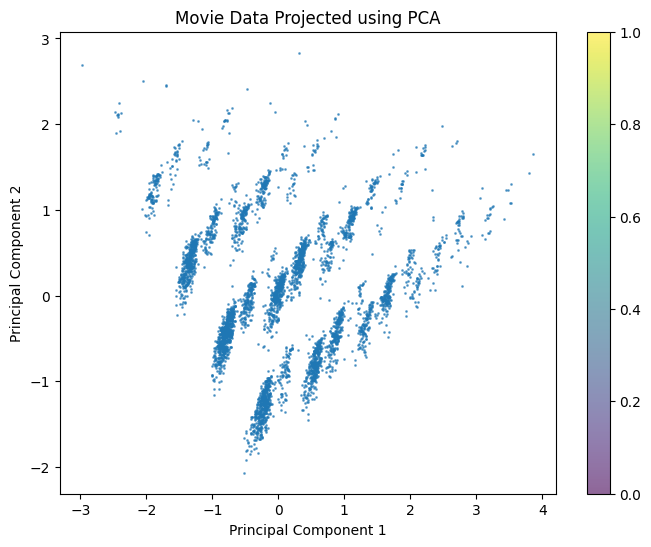

In [19]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

# we did exactly this in the lecture notebook
pca = PCA(n_components = 2)
pca_decomp = pca.fit(np.array(encoded_labels))
pca_decomp = pca.transform(np.array(encoded_labels))

plt.figure(figsize=(8, 6))
plt.scatter(pca_decomp[:, 0], pca_decomp[:, 1], cmap='tab10', alpha=0.6, s=1)
plt.colorbar()
plt.title('Movie Data Projected using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

*Your text answer here*

it shows that movies' closeness and vocubalary are correlated

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

*Your answer here*

In [20]:
print(pca.explained_variance_ratio_)

[0.06989834 0.04298157]


**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

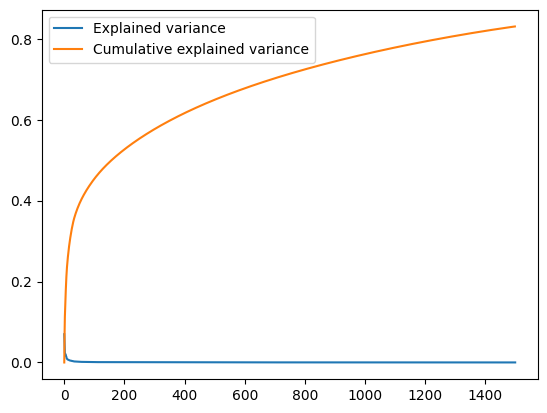

In [29]:
# Set up PCA object with the desired number of components
pca2 = PCA(n_components=1500)
pca_decomp2 = pca2.fit(np.array(encoded_labels))
powers = pca2.explained_variance_ratio_

plt.plot(powers, label="Explained variance")
plt.plot([np.sum(powers[:i]) for i in range(len(powers)-1)], label="Cumulative explained variance")
plt.legend()
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [30]:
total_variance = 0
for i  in range(len(powers)):
  total_variance = total_variance + powers[i]
  if total_variance >= 0.8:
    print(str(i + 1))
    break

1246


*Your text answer here*

1246


**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [31]:
n_dims = 1240
pca_fin = PCA(n_components=1240)
labels_pca = pca_fin.fit(np.array(encoded_labels))
labels_pca = pca_fin.transform(np.array(encoded_labels))
labels_pca = labels_pca.tolist()
df["overview_pca"] = labels_pca

# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [32]:
# import KMeans class
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=20)
kmeans.fit(labels_pca)

y_preds = kmeans.predict(labels_pca)
df["cluster_kmeans"] = y_preds # set predictions

# print out elements of cluster 0
cluster_index = 0
cluster_indices = np.where(kmeans.labels_ == cluster_index)[0]
for index in cluster_indices:
  print(df['title'][index])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The Hobbit: An Unexpected Journey
Stealth
The Hunger Games: Mockingjay - Part 1
Gone in Sixty Seconds
Charlie's Angels
Tropic Thunder
Bicentennial Man
Volcano
Memoirs of a Geisha
Hellboy II: The Golden Army
Lost in Space
Hairspray
Hotel for Dogs
The Man from U.N.C.L.E.
Titan A.E.
Sphere
This Means War
Wyatt Earp
The Shaggy Dog
Hellboy
The Legend of Bagger Vance
City of Angels
Blade II
Valentine's Day
Failure to Launch
Garfield
Beautiful Creatures
Inchon
Galaxy Quest
Multiplicity
Nixon
The Fugitive
The Lake House
Aliens vs Predator: Requiem
Morning Glory
Quest for Camelot
Memoirs of an Invisible Man
Amélie
Extreme Ops
Joe Somebody
We're the Millers
Species
Friends with Benefits
Poltergeist
Krull
Pushing Tin
The Butler
The First Wives Club
District 9
30 Days of Night
North Country
Glory
DOA: Dead or Alive
Aladdin
Florence Foster Jenkins
Last Vegas
Rendition
Clockstoppers
Teenage Mutant Ninja Turtles II: The Secret of the Ooze
Tombstone
August: Osage County
My Soul to Take
Mrs. Winterbour

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

*Your text answer here*

The hobbit and the hunger games go well together but it doesn't go well together with Valentine's Day under my opinion. Yet, I don't know enough movies in this list to judge the correctness.

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

*Your text answer here*

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

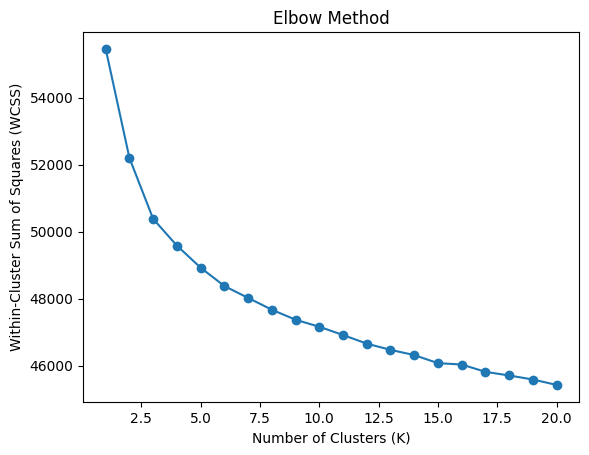

In [33]:
wcss = []
k_values = range(1, 21)
for k in k_values:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(labels_pca)
  wcss.append(kmeans.inertia_)

#Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

There is no clear elbow to be seen. Intuitively, I would choose between 5 and 10 clusters.

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [34]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=20)
gmm.fit(labels_pca)
df['cluster_gmm'] = gmm.predict(labels_pca)

#print
for i in range(len(labels_pca)):
  if gmm.predict([labels_pca[i]]) == 1:
    print(df['title'][i])

Avengers: Age of Ultron
Terminator Salvation
Furious 7
The Legend of Tarzan
Wild Wild West
The Lovers
The Sorcerer's Apprentice
Alexander
Angels & Demons
Lethal Weapon 4
Captain America: The First Avenger
Penguins of Madagascar
The Hunger Games: Catching Fire
War of the Worlds
The Bourne Legacy
Mission: Impossible II
Ghost Rider
How Do You Know
The Green Hornet
Kingdom of Heaven
The Peanuts Movie
Transcendence
Now You See Me 2
Divergent
Six Days Seven Nights
Thirteen Days
The Postman
Babe: Pig in the City
Top Cat Begins
Jack and Jill
The League of Extraordinary Gentlemen
Children of Men
Shark Tale
Unbreakable
Hook
Alvin and the Chipmunks: The Squeakquel
We Were Soldiers
The X Files
The Matrix
You've Got Mail
Resident Evil: Retribution
Everest
Austin Powers in Goldmember
3000 Miles to Graceland
The Jackal
Alien: Resurrection
Year One
Sinbad: Legend of the Seven Seas
After the Sunset
Superman
Alien³
Instinct
Elizabethtown
Lucky You
American Reunion
Gremlins 2: The New Batch
The Judge
On 

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

*Your text answer here*

Since all movies are action movies it seams to classifie them correctly. Overall this method seems to work better than the Kmeans method above.


**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

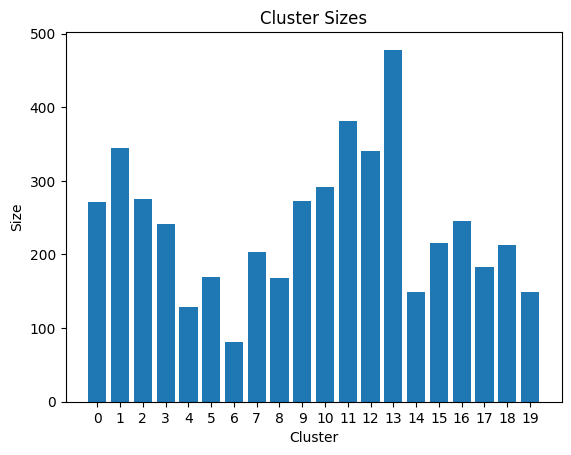

In [35]:
# Create an array for the x-axis positions
clusternums = np.arange(20)
clustersizes = np.bincount(gmm.predict(labels_pca))
fig, ax = plt.subplots()

# Plotting the bars
ax.bar(clusternums, clustersizes)

# Add labels, title, and legend
ax.set_xlabel('Cluster')
ax.set_ylabel('Size')
ax.set_title('Cluster Sizes')
ax.set_xticks(clusternums)
ax.set_xticklabels(clusternums)
plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

*Your text answer here*

there is significant differences between the sixth and 13th cluster. for clusters 14 to 19 the size is more homogeneous.


# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [43]:
prev_watch = 'Avatar'
if prev_watch in df['title'].tolist():
    indexmovie = df[df['title'] == prev_watch].index[0]
    gmm_cluster = df.at[indexmovie, 'cluster_gmm']
    kmeans_cluster = df.at[indexmovie, 'cluster_kmeans']

    # Iterate through the DataFrame to find movies in the same cluster
    for i, title in enumerate(df['title']):
        if i != indexmovie and df.at[i, 'cluster_gmm'] == gmm_cluster:
            print(title)
else:
    print(f"'{prev_watch}' is not in the DataFrame.")

Tangled
Man of Steel
The Avengers
Star Trek Into Darkness
Jack the Giant Slayer
The Good Dinosaur
WALL·E
A Christmas Carol
The Dark Knight
Up
Inside Out
Snow White and the Huntsman
Maleficent
Dawn of the Planet of the Apes
Shrek Forever After
Harry Potter and the Order of the Phoenix
G-Force
The Last Airbender
Rise of the Guardians
Star Trek
Sahara
Ant-Man
The Da Vinci Code
Rio 2
Sherlock Holmes: A Game of Shadows
The Day After Tomorrow
The Chronicles of Riddick
Speed Racer
Star Wars: Episode II - Attack of the Clones
Asterix at the Olympic Games
Ocean's Twelve
Home on the Range
Real Steel
The Smurfs 2
Speed 2: Cruise Control
Live Free or Die Hard
Minority Report
Django Unchained
The Emperor's New Groove
Blood Diamond
Starship Troopers
Cloud Atlas
Point Break
The Adventures of Pluto Nash
Green Zone
The Lord of the Rings: The Two Towers
The Secret Life of Walter Mitty
The Saint
Mission to Mars
Rio
K-19: The Widowmaker
The Nutcracker: The Untold Story
The Bourne Supremacy
Cats & Dogs 2 :

KeyError: 4399

In [42]:
for i in range(len(df['title'].tolist())):
  if df['cluster_kmeans'][i] == kmeans_cluster:
    print(df['title'][i])

Avatar
Avengers: Age of Ultron
The Good Dinosaur
Iron Man 2
Maleficent
Shrek Forever After
Interstellar
Ratatouille
Thor: The Dark World
Mad Max: Fury Road
Fun with Dick and Jane
Star Trek
Home
Batman & Robin
Life of Pi
Teenage Mutant Ninja Turtles
San Andreas
Little Fockers
End of Days
Cloud Atlas
Treasure Planet
The Flowers of War
The Alamo
Ice Age: Dawn of the Dinosaurs
The Secret Life of Walter Mitty
The Saint
Ocean's Eleven
Hotel Transylvania
Enchanted
102 Dalmatians
Divergent
Scooby-Doo
Over the Hedge
Get Smart
Yogi Bear
Fantasia 2000
The Time Machine
A Sound of Thunder
Pompeii
Red Dragon
Hidalgo
Inspector Gadget
Munich
The Angry Birds Movie
The Legend of Hercules
Saving Private Ryan
Unbroken
The Kid
The Long Kiss Goodnight
Astro Boy
U-571
The Soloist
Captain Corelli's Mandolin
The Fan
Elizabeth: The Golden Age
Seven Pounds
Christmas with the Kranks
The Life of David Gale
Anna Karenina
Panic Room
Journey to the Center of the Earth
The Client
Blended
The Pledge
Rambo: First Blood 

KeyError: 4399

**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

*Your text answer here*

Yes, I believe that the recommended movies are good suggestions.


**Q6.3** How would you try making the recommender systems better?

*Your text answer here*

Adding more variable could improve the outcome.

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

*Your text answer here*

I would try to come up with a scoring system for her to trace her prefernces and include this as a new variable in the model. If these scores mneet a certain threshold we provide hime with all the clusters where his favorite movies are conatined.

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [44]:
def cosine_sim(v1, v2):
    dot_product = np.dot(v1, v2)
    magnitude_v1 = np.linalg.norm(v1)
    magnitude_v2 = np.linalg.norm(v2)
    return dot_product/(magnitude_v2 * magnitude_v1)

# get overview_pca encoding of previously watched film
prev_watch_enc = df['overview_pca'][indexmovie]

sims = [] # set up place to store similarities
for i, row in df.iterrows():
    sims.append(cosine_sim(prev_watch_enc, row['overview_pca']))

df["cos_sim_to_avatar"] = sims
df = df.sort_values('cos_sim_to_avatar') # sort df
df # print to verify

,index,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm,cos_sim_to_avatar
1439,1439,Lions for Lambs,Three stories told simultaneous in ninety minu...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[a, prince, and, a, fellowship, of, companions...",384,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.6744770353593192, 1.1118473309874588, -0.0...",11,15,-0.311616
1833,1833,"Legally Blonde 2: Red, White & Blonde","After Elle Woods, the eternally perky, fashion...","[{""id"": 35, ""name"": ""Comedy""}]",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[a, fable, of, emotional, liberation, and, cho...",375,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.6740570527908059, 1.0515862074476023, -0.6...",11,15,-0.305398
2470,2470,Double Impact,Jean Claude Van Damme plays a dual role as Ale...,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[joe, dirt, is, a, janitor, with, a, mullet, h...",386,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-2.00028870422532, 0.9234745130917525, 0.2451...",11,15,-0.300468
4635,4638,Amidst the Devil's Wings,"Prequel to ""5th of a Degree.""","[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[prequel, to, 5th, of, a, degree]",26,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.4781545409533743, -0.04624171484798169, 0....",18,3,-0.294538
1270,1270,Universal Soldier: The Return,"Luc Deveraux, the heroic former Universal Sold...","[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",Science Fiction,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[to, obtain, a, supply, of, a, rare, mineral, ...",379,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.6342248260901908, 1.4901434867964092, 0.52...",15,15,-0.287441
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,2717,Brokeback Mountain,Brokeback Mountain is an Ang Lee film about tw...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[when, juli, meets, bryce, in, the, second, gr...",259,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6188768049980578, -0.6043606664651012, -0.0...",2,4,0.387779
3523,3524,[REC]²,"The action continues from [REC], with the medi...","[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[the, 8th, installment, in, the, khiladi, series]",163,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.3968463917511125, -0.1531616808231925, 0.20...",4,13,0.387921
935,935,Herbie Fully Loaded,"Maggie Peyton, the new owner of Number 53 - th...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",Family,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[when, the, man, in, the, yellow, hat, befrien...",171,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.133665711839665, 0.257567878927164, 0.30953...",2,13,0.404158
4799,4802,My Date with Drew,Ever since the second grade when he first saw ...,"[{""id"": 99, ""name"": ""Documentary""}]",Documentary,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[ever, since, the, second, grade, when, he, fi...",348,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.3414118761130984, -0.27173580312996287, 0.2...",4,13,1.000000


*Your text answer here*

I dont have enough information to judge whether this is better.


# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [45]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3839 960


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [47]:
print('sorry for not completing this :(')

sorry for not completing this :(


Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

*Your text answer here*

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)